In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np

def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    print(url)



stock = input('Stock to plot: ')
graph_data(stock)

Stock to plot: tsla
Currently pulling: tsla
http://chartapi.finance.yahoo.com/instrument/1.0/tsla/chartdata;type=quote;range=10y/csv


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import urllib
import numpy as np


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=10y/csv'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})
    plt.plot_date(date, closep,'-')
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


Stock to plot: xom
Currently pulling: xom


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc
import urllib
import numpy as np
import datetime as dt

from matplotlib import style

style.use('ourstyle')

print(plt.style.available)

print(plt.__file__)


def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data(stock):

    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently pulling:', stock)
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/'+stock+'/chartdata;type=quote;range=3m/csv'
    print(url)
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')

    for each_line in split_source:
        split_line = each_line.split(',')
        if len(split_line) == 6:
            if 'values' not in each_line:
                stock_data.append(each_line)

    
    date, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',',
                                                          unpack = True,
                                                          converters={0: bytespdate2num('%Y%m%d')})


    x = 0
    y = len(date)

    new_list = []
    while x < y:
        append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        new_list.append(append_line)
        x += 1

        
    
    candlestick_ohlc(ax1, new_list, width=.6, colorup='#41ad49', colordown='#ff1717')
    ax1.grid(True)#, color = 'g', linestyle='-', linewidth=3)
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
##    ax1.annotate('Oil Spill!!', (date[25], highp[25]),
##                 xytext=(0.8, 0.9), textcoords='axes fraction',
##                 arrowprops=dict(facecolor="#585858", color="#585858"))

    bbox_props = dict(boxstyle='round4, pad=0.3', fc="y", ec='k', lw=2)
    ax1.annotate(str(closep[-1]), (date[-1], closep[-1]),
                 xytext = (date[-1]+5, closep[-1]), bbox = bbox_props)

    plt.ylabel('Price')


        
    plt.subplots_adjust(left=.11, bottom=.16, right=.90, top=.95, wspace=.2, hspace=.2)
    plt.show()



stock = input('Stock to plot: ')
graph_data(stock)


ModuleNotFoundError: No module named 'matplotlib.finance'

Currently viewing: replacement data
[736536. 736535. 736534. ... 730124. 730123. 730122.]


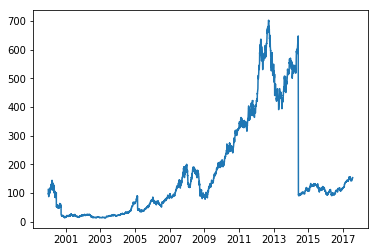

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num
import numpy as np
import urllib
def graph_data():
    print('Currently viewing: replacement data')
    url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for each_line in split_source:
        split_line = each_line.split(',')
        #if len(split_line) == 7:
        if 'Date' not in each_line:
            stock_data.append(each_line) 
                           
    date, openp, highp, lowp, closep, adjusted_close, volume = np.loadtxt(stock_data, delimiter = ',',
                                         unpack = True, converters={0: mdates.bytespdate2num('%Y-%m-%d')})                 
    print(date)
    plt.plot_date(date,closep,'-')
    plt.show()
 
#stock = input('Stock to plot: ')
graph_data()

Currently viewing: replacement data
[736536. 736535. 736534. ... 730124. 730123. 730122.]


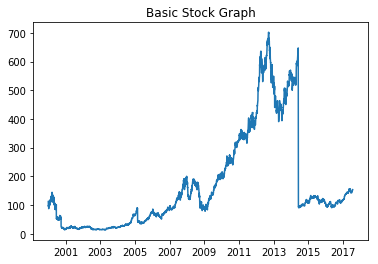

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import bytespdate2num
import numpy as np
import urllib
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.bytespdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter
def graph_data():
    print('Currently viewing: replacement data')
    url = 'https://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    for each_line in split_source:
        split_line = each_line.split(',')
        #if len(split_line) == 7:
        if 'Date' not in each_line:
            stock_data.append(each_line) 
                           
    date, openp, highp, lowp, closep, adjusted_close, volume = np.loadtxt(stock_data, delimiter = ',',
                                         unpack = True, converters={0: mdates.bytespdate2num('%Y-%m-%d')})                 
    print(date)
    plt.plot_date(date,closep,'-')
    plt.title('Basic Stock Graph')
    plt.show()
 
#stock = input('Stock to plot: ')
graph_data()

Stock to plot: tsla
Currently viewing: replacement data
[736536. 736535. 736534. ... 730124. 730123. 730122.]


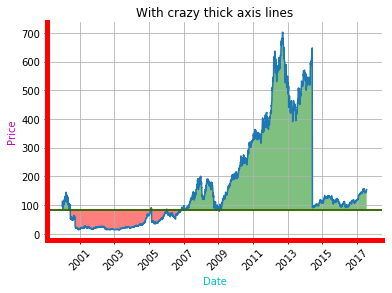

In [19]:
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data():
    
    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently viewing: replacement data')
    url = 'http://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = each_line.split(',')
        #if len(split_line) == 7
        if 'Date' not in each_line:
            stock_data.append(each_line)
            
    date, openp, highp, lowp, closep, adjusted_close, volume = np.loadtxt(stock_data, delimiter = ',',
                                         unpack = True, converters={0: mdates.bytespdate2num('%Y-%m-%d')})  

    print(date)
    ax1.plot_date(date,closep,'-')

    ax1.fill_between(date,closep,84.5,where=(closep >= 83.75), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, 83.75, where=(closep <= 83.75), facecolor='r', alpha = 0.5)
    
    ax1.axhline(83.65, color='r')
    ax1.axhline(83.85, color='g')
    
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')
    
    ax1.spines['left'].set_color('r')
    ax1.spines['bottom'].set_color('r')
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_linewidth(5)
    ax1.spines['bottom'].set_linewidth(5)

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.set_title('With crazy thick axis lines')
    #plt.subplots_adjust(left=0.09,bottom=.16,right=.94,top=.95,wspace=.2,hspace=.2)
    plt.show()
 
stock = input('Stock to plot: ')
graph_data()


Stock to plot: tsla
Currently viewing: replacement data
[736536. 736535. 736534. ... 730124. 730123. 730122.]


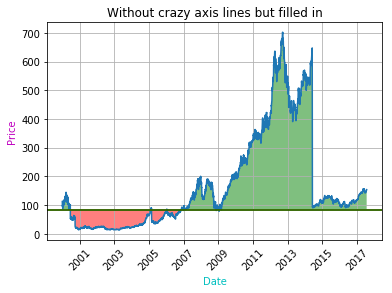

In [18]:
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def graph_data():
    
    fig = plt.figure()
    
    ax1 = plt.subplot2grid((1,1), (0,0))
    plt.ylabel('Price')
    plt.xlabel('Date')
    
    print('Currently viewing: replacement data')
    url = 'http://pythonprogramming.net/yahoo_finance_replacement'
    source_code = urllib.request.urlopen(url).read().decode()
    stock_data = []
    split_source = source_code.split('\n')
    
    for each_line in split_source:
        split_line = each_line.split(',')
        #if len(split_line) == 7
        if 'Date' not in each_line:
            stock_data.append(each_line)
            
    date, openp, highp, lowp, closep, adjusted_close, volume = np.loadtxt(stock_data, delimiter = ',',
                                         unpack = True, converters={0: mdates.bytespdate2num('%Y-%m-%d')})  

    print(date)
    ax1.plot_date(date,closep,'-')

    ax1.fill_between(date,closep,84.5,where=(closep >= 83.75), facecolor='g', alpha=0.5)
    ax1.fill_between(date, closep, 83.75, where=(closep <= 83.75), facecolor='r', alpha = 0.5)
    
    ax1.axhline(83.65, color='r')
    ax1.axhline(83.85, color='g')
    
    ax1.grid(True)
    ax1.yaxis.label.set_color('m')
    ax1.xaxis.label.set_color('c')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.set_title('Without crazy axis lines but filled in')
    #plt.subplots_adjust(left=0.09,bottom=.16,right=.94,top=.95,wspace=.2,hspace=.2)
    plt.show()
 
stock = input('Stock to plot: ')
graph_data()
